# Clustering Stocks with Python

In [41]:
# import essential libraies
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import requests

plt.style.use('ggplot')
%matplotlib inline

API_TOKEN = "Tpk_0ec143b9592f4408a744082bd94be0e2"

In [2]:
# obtain stocks symbols
df = pd.read_csv('nasdaq_screener.csv')['Symbol']

# replace "^" with "-"
# df = df.str.replace("^", "-")

df.head()

0       A
1      AA
2     AAC
3    AACG
4    AACQ
Name: Symbol, dtype: object

In [3]:
# break the symbol list in to 100 chunks
n = 100
symbol_chunk = [df[i:i+n] for i in range(0, df.shape[0], n)]
stocks_exp = list(symbol_chunk[2])

def chunks(list, n):
    for i in range(0, len(list), n):
        yield list[i:i + n]

symbol_lists = list(chunks(df, 100))
symbol_strings = []
for i in range(0, len(symbol_lists)):
    symbol_strings.append(','.join(symbol_lists[i]))

symbol_strings[0]

'A,AA,AAC,AACG,AACQ,AACQU,AACQW,AAIC,AAIC^B,AAIC^C,AAL,AAMC,AAME,AAN,AAOI,AAON,AAP,AAPL,AAT,AAU,AAWW,AB,ABB,ABBV,ABC,ABCB,ABCL,ABCM,ABEO,ABEV,ABG,ABGI,ABIO,ABM,ABMD,ABNB,ABR,ABR^A,ABR^B,ABR^C,ABST,ABT,ABTX,ABUS,AC,ACA,ACAC,ACACU,ACACW,ACAD,ACAH,ACAHU,ACAHW,ACB,ACBAU,ACBI,ACC,ACCD,ACCO,ACEL,ACER,ACET,ACEV,ACEVU,ACEVW,ACGL,ACGLO,ACGLP,ACH,ACHC,ACHL,ACHV,ACI,ACIC,ACII,ACIU,ACIW,ACKIT,ACKIU,ACKIW,ACLS,ACM,ACMR,ACN,ACNB,ACND,ACOR,ACP,ACQRU,ACR,ACR^C,ACRE,ACRS,ACRX,ACST,ACTC,ACTCU,ACTCW,ACTDU,ACTG'

In [7]:
# retrive data from iex api
stock_dict = {}

for symbol in symbol_strings:
    url = f'https://sandbox.iexapis.com/stable/stock/market/batch?symbols={symbol}&types=advanced-stats&token={API_TOKEN}'
    data = requests.get(url).json()
    
    try:
        for stock in data:        
            stock_dict[stock] = data[stock]['advanced-stats']
    except:
        continue

# data.status_code

In [8]:
# transpose the data frame 
stock_df = pd.DataFrame(stock_dict)
stock_df = stock_df.transpose()

stock_df

,beta,totalCash,currentDebt,revenue,grossProfit,totalRevenue,EBITDA,revenuePerShare,revenuePerEmployee,debtToEquity,...,maxChangePercent,year5ChangePercent,year2ChangePercent,year1ChangePercent,ytdChangePercent,month6ChangePercent,month3ChangePercent,month1ChangePercent,day30ChangePercent,day5ChangePercent
A,0.888512,1366363197,1702832618,5741613881,3097507147,5530072062,1307013722,18.78,413608.08,2.044599,...,5.014618,2.47488,0.787767,0.740111,0.134827,0.197074,0.092921,0.036662,0.03701,0.001965
AA,2.015835,2652298152,3275389504,10135858627,1615941451,9861265722,1302903508,54.32,678160.91,4.682639,...,1.4662,1.855856,0.657858,4.673242,0.805876,1.880039,0.998058,0.313158,0.31581,0.125401
AAC,0,None,None,None,None,None,None,None,None,None,...,-0.004692,-0.00474,-0.004621,-0.004575,-0.004661,-0.004777,-0.00459,-0.003565,-0.00356,-0.000516
AACG,3.579907,None,None,None,None,None,None,None,None,None,...,3.473707,4.662558,0.295845,2.692,1.476449,1.567311,-0.540932,-0.275852,-0.279867,-0.060668
AACQ,0,None,None,None,None,None,None,None,None,None,...,-0.009214,-0.009245,-0.009379,-0.009111,-0.068313,0.019943,-0.127717,-0.039257,-0.037872,-0.01201
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZWRKW,0,None,None,None,None,None,None,None,None,None,...,-0.021787,-0.021919,-0.021866,-0.021935,-0.022287,-0.021683,-0.021803,-0.249131,-0.25305,-0.050347
ZY,0,None,None,None,None,None,None,None,None,None,...,0.136895,0.142773,0.139572,0.142779,0.140655,0.139443,0.141801,0.141907,0.140046,-0.078028
ZYME,0.986761,422303633,72580762,31380097,31472263,32734361,-197272441,0.6802,126234,1.357605,...,1.365197,1.367275,0.674574,-0.213302,-0.36365,-0.275159,-0.251592,-0.007829,-0.007802,-0.068419
ZYNE,1.304146,None,None,None,None,None,None,None,None,None,...,-0.737682,-0.365729,-0.659386,0.148624,0.37598,0.208588,-0.119057,0.033109,0.033079,0.018434


# Select the attributes

In [9]:
stock_df['evToEBITDA'] = stock_df['enterpriseValue'] / stock_df['EBITDA']

selected_attributes = ['priceToBook', 'peRatio', 'evToEBITDA']
stock_df = stock_df[selected_attributes]
stock_df

,priceToBook,peRatio,evToEBITDA
A,8.71,52.690597,32.471313
AA,2.47,-102.964229,6.430324
AAC,None,None,NaN
AACG,None,None,NaN
AACQ,None,None,NaN
...,...,...,...
ZWRKW,None,None,NaN
ZY,None,None,NaN
ZYME,3.75,-7.362351,-5.174005
ZYNE,None,None,NaN


As K-Means algorithm does not allow any null input, the next step is to clear null value within the data set

In [40]:
# clear the data set
stock_df = stock_df.dropna(how='any')
stock_df.shape

(1988, 3)

In [37]:
# filter the attributes
pb_filter = stock_df.iloc[:, 0].abs() < 30
pe_filter = stock_df.iloc[:, 1].abs() < 200
ev_filter = stock_df.iloc[:, 2].abs() < 30

stock_df = stock_df[pb_filter & pe_filter & ev_filter]

# change the datatype to float
stock_df = stock_df.astype('float')
stock_df

,priceToBook,peRatio,evToEBITDA
AA,2.4700,-102.964229,6.430324
AAIC,0.6726,-1.971152,-2.004057
AAL,-1.8000,-1.866875,-3.566306
AAOI,0.7673,-3.652310,-12.488699
AAON,10.4000,45.120517,27.959664
...,...,...,...
ZION,1.3400,9.440625,7.182673
ZIXI,11.9100,-27.118873,16.420342
ZTO,2.7100,30.558918,18.555028
ZUMZ,2.1400,15.570778,6.830602


In [39]:
desc_df = stock_df.describe()
desc_df.loc['+3_std'] = desc_df.loc['mean'] + 3 * desc_df.loc['std']
desc_df.loc['-3_std'] = desc_df.loc['mean'] - 3 * desc_df.loc['std']

display(desc_df)

,priceToBook,peRatio,evToEBITDA
count,1988.000000,1988.000000,1988.000000
mean,3.183786,15.984596,10.694153
std,4.603810,36.560095,10.556529
min,-28.790000,-194.570242,-29.747161
25%,1.300000,-1.951037,7.048376
50%,2.315000,16.328806,11.642485
75%,4.270000,30.280710,17.229352
max,29.730000,197.848551,29.930526
+3_std,16.995215,125.664881,42.363740
-3_std,-10.627643,-93.695688,-20.975433


# Plotting the data

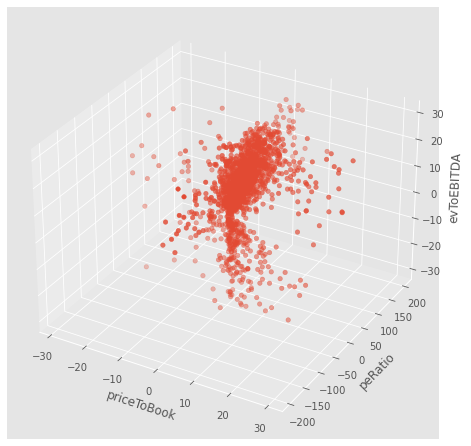

In [44]:
# define the figure
fig = plt.figure(figsize=(8, 6))
ax = Axes3D(fig)

# define x, y, z variables
x = list(stock_df['priceToBook'])
y = list(stock_df['peRatio'])
z = list(stock_df['evToEBITDA'])

# define the axis labels
column_names = stock_df.columns
ax.set_xlabel(column_names[0])
ax.set_ylabel(column_names[1])
ax.set_zlabel(column_names[2])

# define the scatter and marker
ax.scatter(x, y, z, marker='o')

plt.show()

## Scaling the outliners

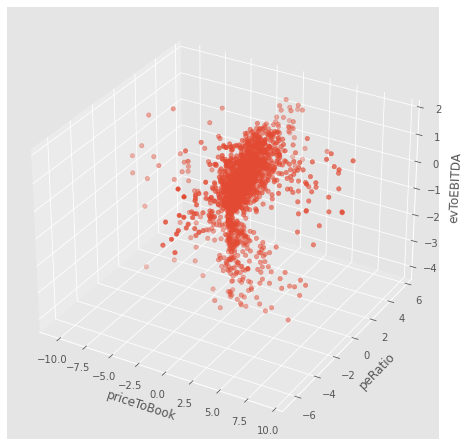

In [47]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

# define each scaler
min_max_scaler = MinMaxScaler()
standard_scaler = StandardScaler()
robust_scaler = RobustScaler()

# scale the data
X_train_minmax = min_max_scaler.fit_transform(stock_df)
X_train_standard = standard_scaler.fit_transform(stock_df)
X_train_robust = robust_scaler.fit_transform(stock_df)

# define the figure
fig = plt.figure(figsize=(8, 6))
ax = Axes3D(fig)

# define x, y, z variables
x = X_train_robust[:, 0]
y = X_train_robust[:, 1]
z = X_train_robust[:, 2]

# define the axis labels
column_names = stock_df.columns
ax.set_xlabel(column_names[0])
ax.set_ylabel(column_names[1])
ax.set_zlabel(column_names[2])

# define the scatter and marker
ax.scatter(x, y, z, marker='o')

plt.show()

## Princinple Component Analysis

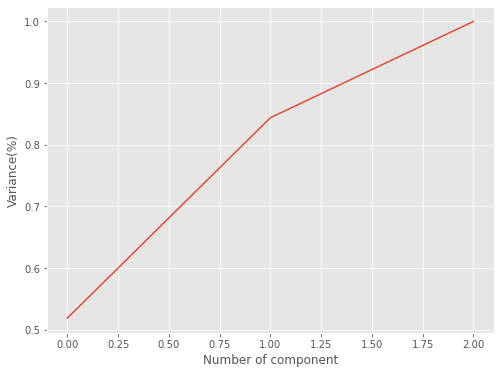

In [50]:
from sklearn.decomposition import PCA
pca = PCA().fit(X_train_robust)

# plot the summation of explained variances
plt.figure(figsize=(8, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))

# define the axis labels
plt.xlabel('Number of component')
plt.ylabel('Variance(%)')

plt.show()

We could infer from the figure that the model can be fully expressed by using only 2 variables, which means that there is not need to employ 3 attributes

## Determine the number of clusters 

In [51]:
from sklearn.cluster import KMeans
from sklearn import metrics

results_dict = {}

no_clusters = 10

# run through each instance of k
for k in range(2, no_clusters+1):

    # define a sub dict to store the results of each k
    results_dict[k] = {}

    # pass through the data into the model
    kmeans = KMeans(n_clusters=k, random_state=0).fit(X_train_robust)

    # define the silhouette score
    sil_score = metrics.silhouette_score(X_train_robust, kmeans.labels_, metric='euclidean')

    # store different metrics into the dict
    results_dict[k]['silhouette_score'] = sil_score
    results_dict[k]['inertia'] = kmeans.inertia_
    results_dict[k]['model'] = kmeans
    results_dict[k]['score'] = kmeans.score

    # print out the result s
    print('The number of cluster is {}'.format(k))
    print('The silhouette score is {}'.format(sil_score))

The number of cluster is 2
The silhouette score is 0.34052822792952
The number of cluster is 3
The silhouette score is 0.2780241713955322
The number of cluster is 4
The silhouette score is 0.30063411977596644
The number of cluster is 5
The silhouette score is 0.34962312038641347
The number of cluster is 6
The silhouette score is 0.375930921447653
The number of cluster is 7
The silhouette score is 0.38210141441693124
The number of cluster is 8
The silhouette score is 0.31210919557002964
The number of cluster is 9
The silhouette score is 0.3291419470328022
The number of cluster is 10
The silhouette score is 0.33520739487268625


### Visualise the silhouette score

In [ ]:
from yellowbrick.cluster import silhouette_visualizer

